# SV Project: gender gap in employment
## Miguel Moreno
## Autumn 2020

**Motivation**

While the statement mentions to explore a gender gap in a health or educational indicator between countries, I have chosen to do it by sector of employment. Although it may not seem to be too indicative of the statement, it can potentially lead to discovering that a gender gap could exist in education, if the employment of each country is based on the education of their citizens. 

This can be because, to most people, employment is the next step *after* completing their education. 

That said, though, this statement can be inaccurate: for instance, the agricultural and industry sector may include engineers developing new machinery for its sector, as well as manual labour workers doing physical work; the service sector could include store clerks, as well as lawyers, politicians or healthcare workers. **Knowing beforehand about the countries (government system, resources, educational systems...) is important to learn how much education can influence this parameters.**

The country itself could also influence the results: one without many natural resources such as land, petrol or rare materials could bias itself to a certain sector (for instances, tropical islands and microstates tend to thrive on services), but in the opposite case (such as center Africa or Australia), they could influence power to other sectors.

The differences in gender can explain, in some countries, the types of work each gender is biased to. That said, in some others the choices (if there are) could be influenced less on personal choice and more on either the people's need for survival or the countries' government plans.

In [ ]:
# Altair initialization
import altair as alt
import pandas as pd
from vega_datasets import data

# from google.colab import files
# uploaded = files.upload()
from google.colab import drive
drive.mount( "/content/drive" )

Mounted at /content/drive


In this project we will explore whether there is a gender gap in some health or education indicator(s) between different countries, which can be selected by the user.

# Visual representation of the gender gap in sector employment

## Part 1: Dataset management


### Gathering raw data

I downloaded the datasets from the [World Data Bank](https://data.worldbank.org/indicator), in particular the 6 datasets refering for each sector of employment (agricultural, industry, services) and gender. The CSV's are downloaded for each dataset.



### Cleaning the raw data

On the .zip there are three files within, which I renamed for convenience:

*   `Metadata_Indicator.csv`: a brief description of the dataset
*   `Metadata_Country.csv`: a description of each country in the dataset, including the code, region, income group, and additional data.
*   `RawData.csv`: the raw data as such. This is the most important file of the folder, and the one I will process in this step. 


---

These are the steps I performed in order to clean the datasets:

1.   Set the following parameters in the parser:

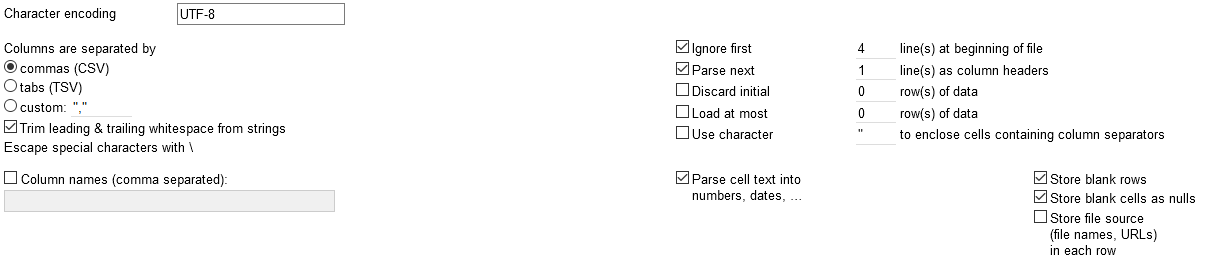


Unfortunately, this will move certain row values by 1 or 2 columns due to two factors: there's a comma in the "Indicator Name", and some country names have a prefix (labeled as ", the", ", Dem. Rep."). It can be fixed in two ways:

1. (cont)

  1.1. Manual: 
  
    --> 1.1.1. Replace in the raw .csv files any instance of ", " with another  non-appearing character in the dataset, such as "; " (Important: both find and 
replace strings must include the space, or it will mess everything up). There should be 277 replacements in each dataset (Due to the cumbersomeness of the following step, I will use this). 
    
    --> 1.1.2. After creating the project, remove all columns from "Indicator Name" to "1990", the "Country Code" column and the last column, which is simply named "Column". Remove all spaces from the `name` column.

    --> 1.1.3. Apply, for the `name` column, the transform operation `value.replace("; ", ", ")` to undo the manual substitution from 1.1.1.
  
  1.2. From OpenRefine, after project creation: 

    --> 1.2.1. Edit every country with a wrong country name so it displays the correct one, and also the columns "Indicator Name", "Indicator Code". An easy way of finding these values is to filter the column "1961" by text: the ones that have something are wrong. Afterwards, erase all columns between "1961" and "1990"

    --> 1.2.2. Shift all numerical values of those columns to the left one unit. This will align all year data values.

    --> 1.2.3. Then, shift every single column to the left one unit.

    --> 1.2.4. Remove all empty columns.

2. Some of the country names will not match, and have to be fixed with these  replacements on the `name` column. You can transform that column by using this block of GREL code (which will also do the operation 1.1.3 if required):

``` 
value.replace("; ", ", ")
     .replace("Congo, Rep.", "Congo")
     .replace("Congo, Dem. Rep.", "Congo, the Democratic Republic of the")
     .replace(", RB", ", Bolivarian Republic of")
     .replace("Bolivia", "Bolivia, Plurinational State of")
     .replace("Kyrgyz Republic", "Kyrgyzstan")
     .replace("Lao PDR", "Lao People's Democratic Republic")
     .replace("Vietnam", "Viet Nam")
     .replace("Yemen, Republic of", "Yemen")
     .replace("Slovak Republic", "Slovakia")
     .replace("Tanzania", "Tanzania, United Republic of")
     .replace("Eswatini", "Swaziland")
     .replace("Macedonia", "Macedonia, the former Yugoslav Republic of")
     .replace("Moldova", "Moldova, Republic of")
     .replace("Dem. People’s Rep.", "Democratic People's Republic of")
     .replace("Dem.", "Democratic")
     .replace("Rep.", "Republic of")
     .replace("Egypt, Arab Rep.", "Egypt")
```



3. Transpose each year's columns selecting the **across columns into rows** option, naming the key column _"Year"_ and the value one _"Data"_. Mark the _"Fill down in other columns"_ checkbox and unmark the _"Ignore blank cells"_ checkbox.
4.   Save the cleaned as a `.CSV` file, with a distinct name (i.e. `cleanDataF.csv` for a female dataset).
5.   Repeat for all other datasets
6.   Once all needed datasets are cleaned, import to the Altair project by running this 2 code snippets (you have to import data depending on whether you are in local or GDrive):




In [1]:
# Altair initialization
import altair as alt
import pandas as pd
from vega_datasets import data #debug


In [2]:
######################################################################## 
# RUN THIS IF AND ONLY IF YOU ARE RUNNING THIS PROJECT IN GOOGLE DRIVE #
# COMMENT OR DELETE THIS BLOCK IF YOU ARE IN LOCAL LINUX               #
######################################################################## 
import io
from google.colab import drive
drive.mount( "/content/drive" )

# Part 1: gender gap in employment by sector 
countriesSV = pd.read_json( "/content/drive/My Drive/SV-MMORENO-P1/Project1/datasets/world_110m_country_codes.json" )


menAgri   = pd.read_csv('/content/drive/My Drive/SV-MMORENO-P1/Project1/datasets/agri_male/CleanDataMT.csv')
womenAgri = pd.read_csv("/content/drive/My Drive/SV-MMORENO-P1/Project1/datasets/agri_fem/CleanDataFT.csv")
menIndustry   = pd.read_csv('/content/drive/My Drive/SV-MMORENO-P1/Project1/datasets/industry_male/CleanDataMT.csv')
womenIndustry = pd.read_csv("/content/drive/My Drive/SV-MMORENO-P1/Project1/datasets/industry_fem/CleanDataFT.csv")
menServices     = pd.read_csv('/content/drive/My Drive/SV-MMORENO-P1/Project1/datasets/services_male/CleanDataMT.csv')
womenServices   = pd.read_csv("/content/drive/My Drive/SV-MMORENO-P1/Project1/datasets/services_fem/CleanDataFT.csv")

'''
countriesSV = pd.read_json( "/content/drive/My Drive/SV-MMORENO-P1/Project1/datasets/world_110m_country_codes.json" )

menAgri   = pd.read_csv('/content/drive/My Drive/SV-MMORENO-P1/Project1/datasets/agri_male/CleanDataM.csv')
womenAgri = pd.read_csv("/content/drive/My Drive/SV-MMORENO-P1/Project1/datasets/agri_fem/CleanDataF.csv")
menIndustry   = pd.read_csv('/content/drive/My Drive/SV-MMORENO-P1/Project1/datasets/industry_male/CleanDataM.csv')
womenIndustry = pd.read_csv("/content/drive/My Drive/SV-MMORENO-P1/Project1/datasets/industry_fem/CleanDataF.csv")
menServices     = pd.read_csv('/content/drive/My Drive/SV-MMORENO-P1/Project1/datasets/services_male/CleanDataM.csv')
womenServices   = pd.read_csv("/content/drive/My Drive/SV-MMORENO-P1/Project1/datasets/services_fem/CleanDataF.csv")
'''
############################################################################### 
# UNCOMMENT AND RUN THIS IF AND ONLY IF YOU ARE RUNNING THIS PROJECT IN LOCAL #
############################################################################### 
''' 
countriesSV = pd.read_json("./datasets/world_110m_country_codes.json")


menAgri   = pd.read_csv('./datasets/agri_male/CleanDataMT.csv')
womenAgri = pd.read_csv("./datasets/agri_fem/CleanDataFT.csv")
menIndustry   = pd.read_csv('./datasets/industry_male/CleanDataMT.csv')
womenIndustry = pd.read_csv("./datasets/industry_fem/CleanDataFT.csv")
menServices     = pd.read_csv('./datasets/services_male/CleanDataMT.csv')
womenServices   = pd.read_csv("./datasets/services_fem/CleanDataFT.csv")
#indicator = pd.read_csv(".datasets/ndustry_male/Metadata_Indicator.csv")
'''
##################################
# Manager of all merged datasets #
##################################

# Geography data
geom = alt.topo_feature( data.world_110m.url, 'countries' )
countriesSV = countriesSV.drop( columns = [ 'code' ] ) #redundant column

# Merge for choropleth by country names 
menAgri   = pd.merge( menAgri,   countriesSV, how="inner", left_on="CountryName", right_on="name" )
womenAgri = pd.merge( womenAgri, countriesSV, how="inner", left_on="CountryName", right_on="name" )

menIndustry   = pd.merge( menIndustry,   countriesSV, how="inner", left_on="CountryName", right_on="name" )
womenIndustry = pd.merge( womenIndustry, countriesSV, how="inner", left_on="CountryName", right_on="name" )

menServices   = pd.merge( menServices,   countriesSV, how="inner", left_on="CountryName", right_on="name" )
womenServices = pd.merge( womenServices, countriesSV, how="inner", left_on="CountryName", right_on="name" )

# debug
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# necessary option to process everything at Colab
alt.data_transformers.disable_max_rows() 

Mounted at /content/drive


DataTransformerRegistry.enable('default')

Now I will use Panda's utilities to create a new column, `Type`, and fill all potential null values: the non-found `id`'s and all `Data` entries.



In [3]:
# Adding Type, Sex columns
menAgri['Type'] = 'Agricultural'  
womenAgri['Type'] = 'Agricultural' 

menIndustry['Type'] = 'Industrial'  
womenIndustry['Type'] = 'Industrial' 
 
menServices['Type'] = 'Services'   
womenServices['Type'] = 'Services' 

# Be able to run the choropleth, even with non-found  country IDs

menAgri[ 'id' ] = menAgri[ 'id' ].fillna( -1 )
menAgri[ 'id' ] = menAgri[ 'id' ].astype( int )
womenAgri[ 'id' ] = womenAgri[ 'id' ].fillna( -1 )
womenAgri[ 'id' ] = womenAgri[ 'id' ].astype( int )

menIndustry[ 'id' ] = menIndustry[ 'id' ].fillna( -1 )
menIndustry[ 'id' ] = menIndustry[ 'id' ].astype( int )
womenIndustry[ 'id' ] = womenIndustry[ 'id' ].fillna( -1 )
womenIndustry[ 'id' ] = womenIndustry[ 'id' ].astype( int )
 
menServices[ 'id' ] = menServices[ 'id' ].fillna( -1 )
menServices[ 'id' ] = menServices[ 'id' ].astype( int )
womenServices[ 'id' ] = womenServices[ 'id' ].fillna( -1 )
womenServices[ 'id' ] = womenServices[ 'id' ].astype( int )

# Fill all Data entries with zeroes
menAgri[ 'Data' ] = menAgri[ 'Data' ].fillna( 0 )
menAgri[ 'Data' ] = menAgri[ 'Data' ].astype( float )
womenAgri[ 'Data' ] = womenAgri[ 'Data' ].fillna( 0 )
womenAgri[ 'Data' ] = womenAgri[ 'Data' ].astype( float )

menIndustry[ 'Data' ] = menIndustry[ 'Data' ].fillna( 0 )
menIndustry[ 'Data' ] = menIndustry[ 'Data' ].astype( float )
womenIndustry[ 'Data' ] = womenIndustry[ 'Data' ].fillna( 0 )
womenIndustry[ 'Data' ] = womenIndustry[ 'Data' ].astype( float )
 
menServices[ 'Data' ] = menServices[ 'Data' ].fillna( 0 )
menServices[ 'Data' ] = menServices[ 'Data' ].astype( float )
womenServices[ 'Data' ] = womenServices[ 'Data' ].fillna( 0 )
womenServices[ 'Data' ] = womenServices[ 'Data' ].astype( float ) 

print('Block executed')

Block executed


Finally, I will append all sectors into one, along with their gender, denoted as `Sex`. Moreover, I will clean all NaN entries in the `name` column.



In [4]:
sectorsM = menAgri.append( menIndustry ).append( menServices )
sectorsM = sectorsM[ sectorsM[ 'name' ].notna() ]
sectorsM['Sex'] = 'M'
sectorsM = sectorsM.reset_index() 

sectorsF = womenAgri.append( womenIndustry ).append( womenServices )
sectorsF = sectorsF[ sectorsF[ 'name' ].notna() ]
sectorsF['Sex'] = 'F'
sectorsF = sectorsF.reset_index() 

# append all sectors into one, and remove id NaN (again)
sectorsDataset = sectorsM.append( sectorsF )
sectorsDataset = sectorsDataset[ sectorsDataset[ 'id' ].notna() ]

# remake indices (leftmost tab), which were skewed due to the NaN removal
sectorsDataset = sectorsDataset.reset_index() 
 
print('Block executed')

Block executed


## Part 2: Visualization of the datasets

### Drawing the choropleth

These are the steps to be done to draw a choropleth with my data:

1.   Get the datasets you want to compare and the `world_110m` dataset; the former has the data we want to visualize, the latter the information to map the countries into the choropleth
2.   We merge each dataset with the world one for `name` as the join key
3.   Clean null/empty country IDs setting their value to -1
4.   Fill null/empty data per year with zeroes
5.   Construct a range between [1991..2020] to fetch the columns of each desired year
6.   Draw the choropleths

 


In [29]:
# Year selector
years = [ str(i) for i in range(1991, 2021) ]
yearRange = alt.binding_range( min=1991, max=2020, step=1 ) # sliderRange 
yearSlider = alt.selection_single(name = "Pick a", 
                                fields = ["Year"], 
                                bind   = yearRange, 
                                init   = { "Year" :  2020 } )
 
myColour = alt.condition(yearSlider,
            alt.Color('Data:Q'),
            alt.value('lightgray')
)
 
# cross selection
crossSel = alt.selection_multi(fields = [ 'id' ] )

# Create pivot table for male sector's dataset
smP = menAgri
smP[ 'Year' ] = smP[ 'Year' ].astype( str ) # turn column names into strings
smP = smP.pivot(index=['id', 'name', 'Type'], columns='Year', values='Data').reset_index()

choroplethMale1 = alt.Chart( geom, title="Male employment in agriculture" ).mark_geoshape( stroke='black', strokeWidth=0.05
).encode(
    color = alt.condition(
        'datum.Data > 0',
        alt.Color( 'Data:Q', scale=alt.Scale( type='linear', scheme='greens') ),
        alt.value( '#666666' )
    ),
    tooltip = ['Data:Q', 'Type:N', 'name:N']
).transform_lookup(
    lookup = 'id', 
    from_  = alt.LookupData( data = smP, key='id', fields = years + ['name', 'Type'] )
).transform_fold(
    years, 
    as_ = ['Year', 'Data']
).project(
    type='mercator',
    clipExtent= [[0, 0], [600, 400]] 
).transform_calculate(
    Year = 'parseInt( datum.Year )',
    Data = 'isValid( datum.Data ) ? datum.Data : 0.0'  
).add_selection( 
    yearSlider   
).transform_filter( 
    yearSlider
).transform_filter( 
    alt.datum.id != 10 # remove antarctica
).properties( width=600, height=400 ).add_selection(crossSel).transform_filter(crossSel)

smP = menIndustry
smP[ 'Year' ] = smP[ 'Year' ].astype( str ) # turn column names into strings
smP = smP.pivot(index=['id', 'name', 'Type'], columns='Year', values='Data').reset_index()


choroplethMale2 = alt.Chart( geom, title="Male employment in industries" ).mark_geoshape( stroke='black', strokeWidth=0.05
).encode(
    color = alt.condition(
        'datum.Data > 0',
        alt.Color( 'Data:Q', scale=alt.Scale( type='linear', scheme='oranges') ),
        alt.value( '#666666' )
    ),
    tooltip = ['Data:Q', 'Type:N', 'name:N']
).transform_lookup(
    lookup = 'id', 
    from_  = alt.LookupData( data = smP, key='id', fields = years + ['name', 'Type'] )
).transform_fold(
    years, 
    as_ = ['Year', 'Data']
).project(
    type='mercator',
    clipExtent= [[0, 0], [600, 400]] 
).transform_calculate(
    Year = 'parseInt( datum.Year )',
    Data = 'isValid( datum.Data ) ? datum.Data : 0.0'  
).add_selection( 
    yearSlider   
).transform_filter( 
    yearSlider
).transform_filter( 
    alt.datum.id != 10 # remove antarctica
).properties( width=600, height=400 ).add_selection(crossSel).transform_filter(crossSel)

smP = menServices
smP[ 'Year' ] = smP[ 'Year' ].astype( str ) # turn column names into strings
smP = smP.pivot(index=['id', 'name', 'Type'], columns='Year', values='Data').reset_index()



choroplethMale3 = alt.Chart( geom, title="Male employment in services"  ).mark_geoshape( stroke='black', strokeWidth=0.05
).encode(
    color = alt.condition(
        'datum.Data > 0',
        alt.Color( 'Data:Q', scale=alt.Scale( type='linear', scheme='blues') ),
        alt.value( '#666666' )
    ),
    tooltip = ['Data:Q', 'Type:N', 'name:N']
).transform_lookup(
    lookup = 'id', 
    from_  = alt.LookupData( data = smP, key='id', fields = years + ['name', 'Type'] )
).transform_fold(
    years, 
    as_ = ['Year', 'Data']
).project(
    type='mercator',
    clipExtent= [[0, 0], [600, 400]] 
).transform_calculate(
    Year = 'parseInt( datum.Year )',
    Data = 'isValid( datum.Data ) ? datum.Data : 0.0'  
).add_selection( 
    yearSlider   
).transform_filter( 
    yearSlider
).transform_filter( 
    alt.datum.id != 10 # remove antarctica
).properties( width=600, height=400 ).add_selection(crossSel).transform_filter(crossSel)

##################################################
# Create pivot table for female sector's dataset #
##################################################

sfP = womenAgri
sfP[ 'Year' ] = sfP[ 'Year' ].astype( str ) # turn column names into strings
sfP = sfP.pivot(index=['id', 'name', 'Type'], columns='Year', values='Data').reset_index()

choroplethFemale1 = alt.Chart( geom, title="Female employment in agriculture"  ).mark_geoshape( stroke='black', strokeWidth=0.05
).encode(
    color = alt.condition(
        'datum.Data > 0',
        alt.Color( 'Data:Q', scale=alt.Scale( type='linear', scheme='greens') ),
        alt.value( '#666666' )
    ),
    tooltip = ['Data:Q', 'Type:N', 'name:N']
).transform_lookup(
    lookup = 'id', 
    from_  = alt.LookupData( data = sfP, key='id', fields = years + ['name', 'Type'] )
).transform_fold(
    years, 
    as_ = ['Year', 'Data']
).project(
    type='mercator',
    clipExtent= [[0, 0], [600, 400]] 
).transform_calculate(
    Year = 'parseInt( datum.Year )',
    Data = 'isValid( datum.Data ) ? datum.Data : 0.0'  
).add_selection( 
    yearSlider   
).transform_filter( 
    yearSlider
).transform_filter( 
    alt.datum.id != 10 # remove antarctica
).properties( width=600, height=400 ).add_selection(crossSel).transform_filter(crossSel)

sfP = womenIndustry
sfP[ 'Year' ] = sfP[ 'Year' ].astype( str ) # turn column names into strings
sfP = sfP.pivot(index=['id', 'name', 'Type'], columns='Year', values='Data').reset_index()



choroplethFemale2 = alt.Chart( geom, title="Female employment in industries" ).mark_geoshape( stroke='black', strokeWidth=0.05
).encode(
    color = alt.condition(
        'datum.Data > 0',
        alt.Color( 'Data:Q', scale=alt.Scale( type='linear', scheme='oranges') ),
        alt.value( '#666666' )
    ),
    tooltip = ['Data:Q', 'Type:N', 'name:N']
).transform_lookup(
    lookup = 'id', 
    from_  = alt.LookupData( data = sfP, key='id', fields = years + ['name', 'Type'] )
).transform_fold(
    years, 
    as_ = ['Year', 'Data']
).project(
    type='mercator',
    clipExtent= [[0, 0], [600, 400]] 
).transform_calculate(
    Year = 'parseInt( datum.Year )',
    Data = 'isValid( datum.Data ) ? datum.Data : 0.0'  
).add_selection( 
    yearSlider   
).transform_filter( 
    yearSlider
).transform_filter( 
    alt.datum.id != 10 # remove antarctica
).properties( width=600, height=400 ).add_selection(crossSel).transform_filter(crossSel)


sfP = womenServices
sfP[ 'Year' ] = sfP[ 'Year' ].astype( str ) # turn column names into strings
sfP = sfP.pivot(index=['id', 'name', 'Type'], columns='Year', values='Data').reset_index()

choroplethFemale3 = alt.Chart( geom, title="Female employment in services" ).mark_geoshape( stroke='black', strokeWidth=0.05
).encode(
    color = alt.condition(
        'datum.Data > 0',
        alt.Color( 'Data:Q', scale=alt.Scale( type='linear', scheme='blues') ),
        alt.value( '#666666' )
    ),
    tooltip = ['Data:Q', 'Type:N', 'name:N']
).transform_lookup(
    lookup = 'id', 
    from_  = alt.LookupData( data = sfP, key='id', fields = years + ['name', 'Type'] )
).transform_fold(
    years, 
    as_ = ['Year', 'Data']
).project(
    type='mercator', 
    clipExtent= [[0, 0], [600, 400]] # cut made to visualize better w/o Antarctica
).transform_calculate(
    Year = 'parseInt( datum.Year )',
    Data = 'isValid( datum.Data ) ? datum.Data : 0.0'  
).add_selection( 
    yearSlider   
).transform_filter( 
    yearSlider
).transform_filter( 
    alt.datum.id != 10 # remove Antarctica
).properties( width=600, height=400 ).add_selection(crossSel).transform_filter(crossSel)


# write plots

( choroplethMale1 | choroplethFemale1 ).resolve_scale(
    color='independent'
) & ( choroplethMale2 | choroplethFemale2 ).resolve_scale(
    color='independent'
) & ( choroplethMale3 | choroplethFemale3 ).resolve_scale(
    color='independent'
)  

alt.VConcatChart(...)

### Bubble chart
For the bubble chart I performed this steps:


1.   For each of the possible interaction mechanisms (sliders, spinboxes) I first made the binding range for the year. 

Selection will be made with a bar plot to allow the user to select more than two options with the `Shift` key, and all countries can be selected if there's only 1 country selected and you click that one.
2.   Write 2 plots:

  2.1.   A base plot will specify how will each plot be drawn. Opacity displays the sex of the subsector (transparent = female, opaque = men). Moreover, the ranges have been set to [0..100] to make the visualization easier to read.

  2.2.   A base plot will specify how will each plot be drawn. Opacity displays the sex of the subsector (transparent = female, opaque = men). Moreover, the ranges have been set to [0..100] to make the visualization easier to read.

  
  2.2.   The last one will sum those ones and add the binding properties to select the year and the type of sector to choose.





In [28]:
# Year selector
yearRange = alt.binding_range( min=1991, max=2020, step=1 ) # sliderRange 
yearSlider = alt.selection_single(name = "Pick a", 
                                fields = ["Year"], 
                                bind   = yearRange, 
                                init   = { "Year" :  2020 } )
 

  
# Sector options
sectorTypes = [ 'Agricultural', 'Industrial', 'Services' ]
sectors = alt.binding_radio( options = sectorTypes )
sectorSelect = alt.selection_single(name   = "Select a", 
                                    fields=['Type'],
                                    bind  = sectors,
                                    init  = { "Type" : 'Agricultural' })
 


# Country selectors: sorted list of appearing countries
countryList = list( { i for i in sectorsDataset['name'] } )
countryList.sort()
  
# Create custom plot for selection of countries: Multi-select done with SHIFT key!
countryDF = pd.DataFrame( { "name" : countryList} )
myCountries = alt.selection_multi( fields = ['name'], init = [ { 'name' : 'France' }, { 'name' : 'Spain' } ])

countryCol = alt.condition( 
    myCountries, 
    alt.Color( 'name:N', legend=None ), 
    alt.value( 'lightgray' ) 
)

selectCountry = alt.Chart( countryDF ).mark_bar(size=9).encode(
    x = alt.X('name:O', title="Select countries (press SHIFT for multiples)"),
    color = countryCol, 
    tooltip=[ 'name:N' ]
).add_selection(
    myCountries
).properties(
    width=1600,
    height=50
)


# Drawing bubble plot
bubblePlot = alt.Chart( sectorsDataset ).mark_circle( 
).encode(
    x = alt.X('Data:Q', scale=alt.Scale(domain=(0, 100)), title="" ),
    y = alt.Y('nameShort:N', title="" ),
    size = 'Data:Q',
    color = 'name:N', 
    tooltip=[ 'name:N', 'Sex:N', 'Data:Q'],  
    opacity=alt.condition(
              alt.datum.Sex == 'M',
              alt.value(1.0),
              alt.value(0.5)
            )
).properties(
    width=1400,
    height=400
).transform_calculate( 
    nameShort = 'upper( slice( datum.name, 0, 7) )'
).add_selection(
    sectorSelect, yearSlider
).transform_filter(
    yearSlider & sectorSelect
).transform_filter( 
    myCountries 
)

alt.vconcat(bubblePlot, selectCountry)

Output hidden; open in https://colab.research.google.com to view.